In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Process Metadata

In [2]:
fpath = 'raw-metadata.tsv'
df_metadata = pd.read_csv(fpath, sep='\t')
df_metadata

,Classificação Menopausa (STRAW),ID VAGINAL,ID FEZES,Local de coleta,Data da coleta,Nome,Identidade,Data de Nascimento,Idade,Endereço,Telefone,Uso de TRH (Terapia de reposição Hormonal),Uso de outros medicamentos,Cirurgias,Idade Menarca,Em uso de DIU
0,Pós-menopausa,NaN,M01,LAPAC,1/8/2020,Maria de Fátima Ferreira,M-4.609.376,2/19/1964,56 ANOS,"Rua do Bosque, 14, Santa Cruz",31 989872528,NÃO,NaN,NaN,13.0,Não
1,Pós-menopausa,NaN,M03,LAPAC,2/8/2020,Marilene Aparecida Novais Pereira,MG- 183310,7/22/1961,59 ANOS,"Rua Abelardo Braga, 256A",31 986796916,NÃO,"clonazepam, sertralina","cesárea, laqueadura",13.0,Não
2,Pós-menopausa,MV01,M05,LAPAC,2/2/2021,Maria Correia da Silva Cardoso,M 14.853.693,8/27/1965,56 ANOS,"Rua Tenente José Pedro n°127ª, Antônio Dias\n\n",31 987221246,NÃO,"HCTZ, losartana, metformina","cesárea, laqueadura",10.0,Não
3,Pós-menopausa,NaN,M06,LAPAC,1/8/2020,Elizabeth Chades Pinheiro,MG-3073050,7/17/1958,62 ANOS,"Rua Jair Albergaria, 43, Água Limpa",31 998541893,NÃO,alendronato,"hemorróida, cesárea",14.0,Não
4,Pós-menopausa,NaN,M09,LAPAC,1/8/2020,Lucia Maria Silva,NaN,1/5/1967,53 ANOS,"Rua das Flores, 4",31 997969784,NÃO,Pantoprazol,NaN,12.0,Não
5,Pós-menopausa,NaN,M12,LAPAC,1/8/2020,Maria Aparecida Martins Guimarães,NaN,4/30/1964,56 ANOS,"Avenida Americo Renne Gianetti, 1707",31 35514187,NÃO,"Levotiroxina, HCTZ e Enalapril","Cesárea, laqueadura",16.0,Não
6,Pós-menopausa,NaN,M19,LAPAC,1/8/2020,Maria Auxiliadora Zacarias,NaN,2/12/1962,58 ANOS,"Rua Francisco Zacarias, 2",31 35537213,NÃO,"atenolol, anlodipino, losartana, levotiroxina,...",NaN,12.0,Não
7,Pós-menopausa,MV02,M33,LAPAC,2/2/2021,Sueli Aparecida Pereira Cupertino,NaN,11/6/1969,52 ANOS,"Rua 15 de Novembro n° 258, Morro Santana\n\n",31 98264-9116\n3552-0793,NÃO,NaN,"cesárea, implante dentário",14.0,Não
8,Pós-menopausa,MV03,M34,LAPAC,2/2/2021,Maria Aparecida Alves Rocha,MG 4632513,12/12/1963,58 ANOS,"Rua Jaimin n°192, Santa Cruz\n\n",98563-5493,NÃO,NaN,"cisto na mama, hemorróida, laqueadura",NaN,Não
9,Pós-menopausa,MV04,M35,LAPAC,2/2/2021,Maria Goretti de Souza,NaN,6/21/1963,58 ANOS,"Rua Henrique Adeodato \nn°135E, Rosário\n\n",31 988677911\n35512772,NÃO,"atenolol, losartana, metformina","mastectomia, cesárea",8.0,Não


In [3]:
# Create a set of IDs
ids = set(df_metadata['ID FEZES'].tolist())

In [4]:
fpath = 'raw-metadata.tsv'
df_metadata = pd.read_csv(fpath, sep='\t')

# Select a subset of columns
cols = [2,0,3,8,12,13,14] # Selected column index
cols = [2,0,3,8,14] # Selected column index
selected_meta_df = df_metadata.iloc[:, cols]

# Rename columns
new_cols = {'Classificação Menopausa (STRAW)': 'class-straw',
            'ID FEZES': 'sample-id', 
            'Local de coleta': 'local-coleta', 
            'Idade': 'idade', 
            'Uso de outros medicamentos': 'medicamentos',
            'Cirurgias': 'cirurgias',
            'Idade Menarca': 'idade-menarca'
           }
selected_meta_df = selected_meta_df.rename(columns=new_cols)

selected_meta_df['class-straw'].replace('Pós-menopausa', 'PM', inplace=True)


# Clean `Idade` column
selected_meta_df['idade'] = selected_meta_df['idade'].str.split(' ', expand=True)[0]
selected_meta_df['idade'] = selected_meta_df['idade'].fillna(method='bfill', axis=0)
selected_meta_df['idade'] = selected_meta_df['idade'].astype(int)

# Clean `Idade Menarca` column
selected_meta_df['idade-menarca'].fillna(method='bfill', axis=0, inplace=True)
selected_meta_df['idade-menarca'] = selected_meta_df['idade-menarca'].astype(int)
selected_meta_df

,sample-id,class-straw,local-coleta,idade,idade-menarca
0,M01,PM,LAPAC,56,13
1,M03,PM,LAPAC,59,13
2,M05,PM,LAPAC,56,10
3,M06,PM,LAPAC,62,14
4,M09,PM,LAPAC,53,12
5,M12,PM,LAPAC,56,16
6,M19,PM,LAPAC,58,12
7,M33,PM,LAPAC,52,14
8,M34,PM,LAPAC,58,8
9,M35,PM,LAPAC,58,8


In [5]:
selected_meta_df

,sample-id,class-straw,local-coleta,idade,idade-menarca
0,M01,PM,LAPAC,56,13
1,M03,PM,LAPAC,59,13
2,M05,PM,LAPAC,56,10
3,M06,PM,LAPAC,62,14
4,M09,PM,LAPAC,53,12
5,M12,PM,LAPAC,56,16
6,M19,PM,LAPAC,58,12
7,M33,PM,LAPAC,52,14
8,M34,PM,LAPAC,58,8
9,M35,PM,LAPAC,58,8


Let's open the file `tempo-menopausa.tsv` with the number of years on menopause reproduction cicle.

In [6]:
fpath = 'tempo-menopausa.tsv'
age_df = pd.read_csv(fpath, sep='\t')
age_df.head()

,sample-id,tempo-menopausa
0,M01,7
1,M03,8
2,M05,9
3,M06,10
4,M09,3


<AxesSubplot:>

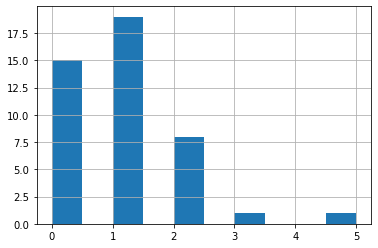

In [7]:
age_df['tempo-menopausa'].apply(lambda x : x//5).hist(range=[0,5], align='mid')

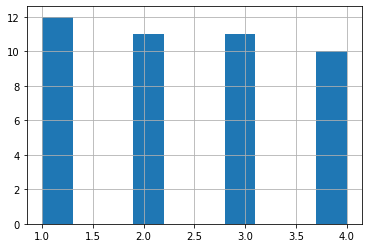

,sample-id,tempo-menopausa,menopausa-age-qcut
0,M01,7,3
1,M03,8,3
2,M05,9,3
3,M06,10,4
4,M09,3,1


In [8]:
age_df['menopausa-age-qcut'], cut_bin = pd.qcut(age_df['tempo-menopausa'], q = 4, labels = [1,2,3,4], retbins = True)
age_df['menopausa-age-qcut'].hist()
plt.show()
age_df.head()

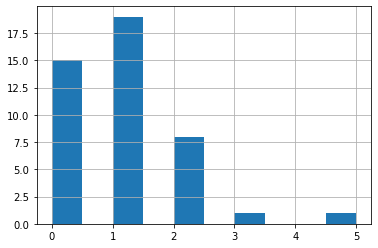

,sample-id,tempo-menopausa,menopausa-age-qcut,menopausa-age-bins
0,M01,7,3,1
1,M03,8,3,1
2,M05,9,3,1
3,M06,10,4,2
4,M09,3,1,0


In [9]:
age_df['menopausa-age-bins'] = age_df['tempo-menopausa'].apply(lambda x : x//5)
age_df['menopausa-age-bins'].hist()
plt.show()
age_df.head()

Now, we going to join tha menopause age dataframe with the metadata dataframe.

In [10]:
selected_meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample-id      44 non-null     object
 1   class-straw    44 non-null     object
 2   local-coleta   44 non-null     object
 3   idade          44 non-null     int64 
 4   idade-menarca  44 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.8+ KB


In [11]:
age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sample-id           44 non-null     object  
 1   tempo-menopausa     44 non-null     int64   
 2   menopausa-age-qcut  44 non-null     category
 3   menopausa-age-bins  44 non-null     int64   
dtypes: category(1), int64(2), object(1)
memory usage: 1.4+ KB


In [12]:
final_metadata_df = selected_meta_df.join(other=age_df.set_index('sample-id'), on='sample-id')
final_metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   sample-id           44 non-null     object  
 1   class-straw         44 non-null     object  
 2   local-coleta        44 non-null     object  
 3   idade               44 non-null     int64   
 4   idade-menarca       44 non-null     int64   
 5   tempo-menopausa     44 non-null     int64   
 6   menopausa-age-qcut  44 non-null     category
 7   menopausa-age-bins  44 non-null     int64   
dtypes: category(1), int64(4), object(3)
memory usage: 2.8+ KB


In [13]:
final_metadata_df.head()

,sample-id,class-straw,local-coleta,idade,idade-menarca,tempo-menopausa,menopausa-age-qcut,menopausa-age-bins
0,M01,PM,LAPAC,56,13,7,3,1
1,M03,PM,LAPAC,59,13,8,3,1
2,M05,PM,LAPAC,56,10,9,3,1
3,M06,PM,LAPAC,62,14,10,4,2
4,M09,PM,LAPAC,53,12,3,1,0


In [14]:
fpath = 'metadata.tsv'
final_metadata_df.to_csv(fpath, index=False, sep='\t')

# Process Manifest

In [15]:
fpath = '~/nupeb/microbiom_menopausa/data/interim/manifest/manifest_source_feces.csv'
df_manifest = pd.read_csv(fpath)
df_manifest = df_manifest.iloc[::2, :] # Select forward rows (even)
df_manifest['sample-id'] = df_manifest['sample-id'].str.split('-', expand=True)[1]
df_manifest

,sample-id,absolute-filepath,direction
0,M05,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward
2,M33,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward
4,M34,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward
6,M35,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward
8,M36,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward
...,...,...,...
142,M155,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward
144,M156,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward
146,M160,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward
148,M162,/home/lauro/nupeb/dados_brutos_rede_genoma/dat...,forward


In [16]:
selected_df = df_manifest[df_manifest['sample-id'].isin(ids)]
selected_ids = set(selected_df['sample-id'].tolist())
ids - selected_ids

{'M01', 'M03', 'M06', 'M09', 'M12', 'M19'}

In [17]:
selected_df.shape

(38, 3)

In [18]:
fpath = 'old-manifest.csv'
df_manifest = pd.read_csv(fpath)
df_manifest = df_manifest[df_manifest['sample-id'].isin(ids)]

In [19]:
df = pd.concat([selected_df, df_manifest], ignore_index=True)
df.shape

(44, 3)

In [20]:
fpath = 'manifest.csv'
df.to_csv(fpath, index=False)